In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data2.txt')
#data = data[data['class'] <= 2]

X = data.as_matrix(columns=['a', 'b'])
X = np.column_stack((np.ones(len(X)), X))
y = data['label'].values

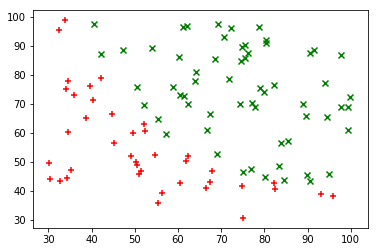

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x0_1, x1_1 = zip(*[(X[i,1], X[i,2]) for i in range(len(X)) if y[i] == 0])
x0_2, x1_2 = zip(*[(X[i,1], X[i,2]) for i in range(len(X)) if y[i] == 1])
plt.scatter(x0_1, x1_1, marker='+', color='red')
plt.scatter(x0_2, x1_2, marker='x', color='green')


In [3]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

theta = np.zeros(3)
theta = np.array([1,1,1])
sig = sigmoid(np.matmul(X, theta))
print(sig)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
import math

def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

def cost_fn(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

theta = np.zeros(3)
print('initial cost', cost_fn(theta, X, y))

import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost_fn, x0=theta, fprime=gradient, args=(X, y))
print(result)
print(cost_fn(result[0], X, y))

initial cost 69.314718056
(array([  4.05471641e-01,  -1.95946453e-07,   9.67860829e-08]), 19, 1)
67.3011667011


/Users/csmith/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/Users/csmith/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in multiply


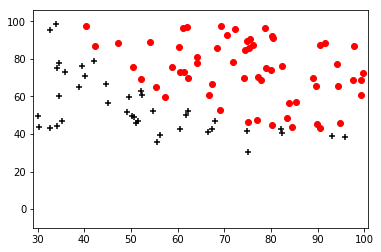

In [5]:
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(-10, y_max, 50))

temp = np.c_[np.ones(2500), xx.ravel(), yy.ravel()]
Z = sigmoid(np.matmul(temp, theta))
from matplotlib import cm

#Z = np.delete(Z, [0], axis=1)
#print(Z.shape, xx.shape)
Z = np.reshape(Z, xx.shape)
#print(Z)
#print(Z.shape)
#print(theta)
x0_1, x1_1 = zip(*[(X[i,1], X[i,2]) for i in range(len(X)) if y[i] == 0])
x0_2, x1_2 = zip(*[(X[i,1], X[i,2]) for i in range(len(X)) if y[i] == 1])


#plt.contourf(xx, yy, Z, cmap=cm.Paired)
plt.contour(xx, yy, Z, np.logspace(-50,50, 50))
plt.scatter(x0_1, x1_1, marker='+', color='black')
plt.scatter(x0_2, x1_2, marker='o', color='red')

xs = np.array([x_min, x_max])
#ys = np.matmul(xs, )
ys = (-1 / theta[2]) * (theta[1] * xs + theta[0])
#print(xs + theta[0])
#print(theta[1], xs, xs * theta[1])# * xs)
#print((theta[1] * xs + theta[0]))
#print(ys)

#x0 = 

samples = np.linspace(-12, 12)
plt.plot(xs, ys, 'k-')